# Notebook Pratique - Classification Binaire

## Instructions importantes!
* Ce Notebook sera utilisé en continu tout au long du cours. Il sera donc important de le garder bien structuré et ordonné.
* À chaque leçon, vous allez rajouter une section à ce Notebook avec les exercices associés aux apprentissages du cours. 
* À la fin du cours, vous obtiendrez un Notebook complet représentant l'entièreté d'un projet d'apprentissage automatique.
* Ce Notebook sera unique et personnalisé pour chaque élève. 
* **Il vous servira donc de référence pour votre projet d'intégration final.**

## Information sur le jeu de données

Tout au long des ateliers, vous allez utiliser ce même jeu de données à plusieurs reprises.

Il s'agit du jeu de données `banknote.csv` représentant des mesures prises sur des photos de billets de banque afin de déterminer s'ils sont des vrais (class = 0) ou des faux (class = 1). 

Lien vers le jeu de données : https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

Voici les colonnes du jeu de données

| Nom original | Nom officiel | Nom pratique |
|--------------|--------------|--------------|
| feature_1    | Variance     | variance     |
| feature_2    | Skewness     | skewness     |
| feature_3    | Curtosis     | curtosis     |
| feature_4    | Entropy      | entropy      |
| prediction   | Class        | class        |

Il y a un total de 1372 billets de banque qui ont été mesurés. Chaque ligne du jeu de données représente les valeurs mesurées pour un billet.

# CORRIGÉ LEÇON #3

## Charger des données

In [ ]:
import pandas as pd

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# 1. Télécharger le jeu de données.
data = pd.read_csv('banknote.csv')

In [ ]:
# 2. Vérifier la taille du jeu de données.

# Obetnir un aperçu sommaire
print(data.shape)
# ou 
print(f'Taille du jeu de données: {data.shape}')

# Pour extraire séparément le nombre de lignes et de colonnes
print(f'Nombre de lignes: {data.shape[0]}')
print(f'Nombre de colonnes: {data.shape[1]}')

# (autre méthode) Pour extraire séparément le nombre de lignes et de colonnes
print(f'Nombre de lignes: {len(data.index)}')
print(f'Nombre de colonnes: {len(data.columns)}')

(1372, 5)
Taille du jeu de données: (1372, 5)
Nombre de lignes: 1372
Nombre de colonnes: 5
Nombre de lignes: 1372
Nombre de colonnes: 5


In [ ]:
# 3. Explorer visuellement les 10 premières lignes du jeu de données.
data.head(10)

,feature_1,feature_2,feature_3,feature_4,prediction
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [ ]:
# 4. Modifier le nom des colonnes en leur attribuant les nom mentionnés ci-haut.

# Définir les nouveaux noms des colonnes dans une liste (en ordre)
colnames = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Assigner les nouveaux noms de colonnes dans le jeu de données
data.columns = colnames

# Vérifier les changements sur les deux premières lignes
data.head(2)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


# CORRIGÉ LEÇON #4

## Statistiques descriptives

In [ ]:
# 1. Aperçu des données
data.head(20)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [ ]:
# 2. Dimensions du jeu de données

# Dimension du jeu de données
print(data.shape)

# Noms des colonnes
print(data.columns)

# Index des lignes
print(data.index)

# Nombre de colonnes
print(f'Nombre de colonnes: {len(data.columns)}')
print(f'Nombre de lignes: {len(data.index)}')

(1372, 5)
Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')
RangeIndex(start=0, stop=1372, step=1)
Nombre de colonnes: 5
Nombre de lignes: 1372


In [ ]:
# 3. Types de données

# Pour chaque variable, obtenir seulement le type de données
print(data.dtypes)

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object


In [ ]:
# Pour chaque variable, obtenir le type de données ET un compte de valeur non-nulle
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [ ]:
# 4. Statistiques descriptives

# Obtenir une description sommaire des données
print(data.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [ ]:
# 5. Sommaire des classes à prédire

# Évaluer si le jeu de données est balancé
print(data.groupby('class').size())

class
0    762
1    610
dtype: int64


In [ ]:
# 6. Corrélations entre les variables

# Produire un tableau de corrélations de Pearson
print(data.corr(method='pearson'))

          variance  skewness  curtosis   entropy     class
variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
class    -0.724843 -0.444688  0.155883 -0.023424  1.000000


In [ ]:
# 7. Distribution et assimétrie ("skewness") des variables

# Obtenir les valeurs d'assimétrie pour chaque variable
print(data.skew())

variance   -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64


# CORRIGÉ LEÇON #5

## Visualisation des données

In [ ]:
# Importer les librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le style des graphiques
sns.set_style("darkgrid")

# Ajout pour retirer les avertissements 
# N'affecte pas les codes et les visualisations
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

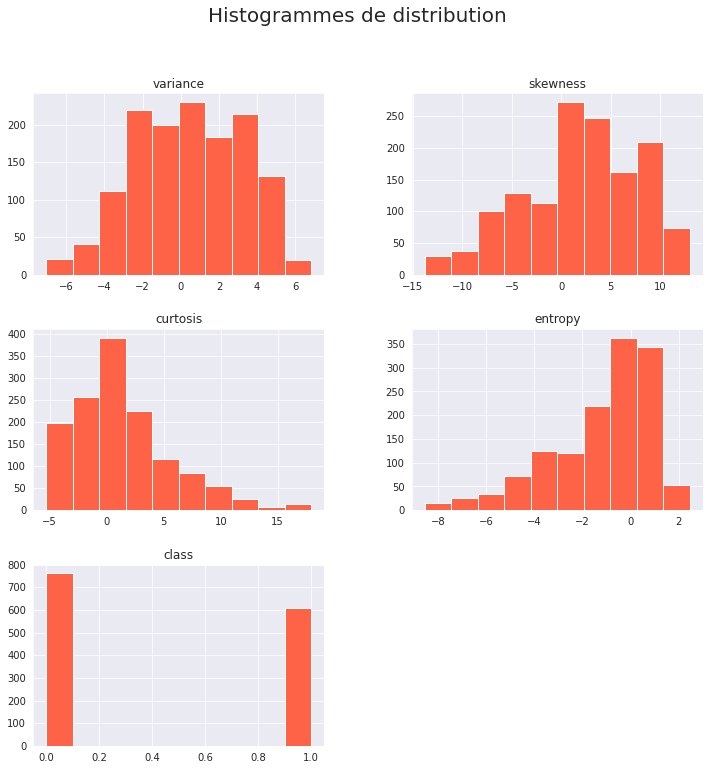

In [ ]:
# 1. Créer un histogramme de distribution

# Créer une matrice de graphiques pour toutes les variables en même temps
data.hist(bins=10, color="tomato", figsize=(12,12))
plt.suptitle("Histogrammes de distribution", fontsize=20)
plt.show()

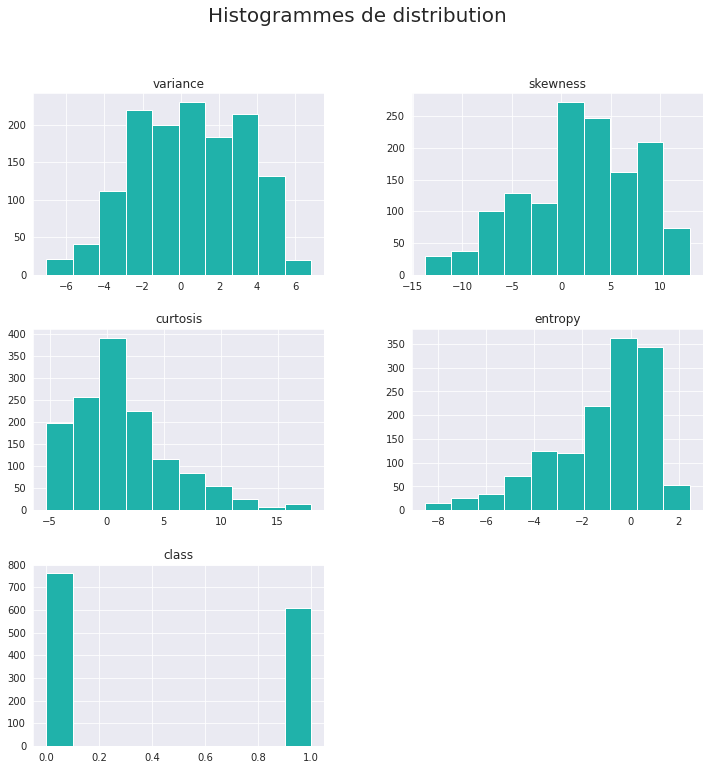

In [ ]:
# Créer une matrice de graphiques pour toutes les variables en même temps
data.hist(bins=10, color="lightseagreen", figsize=(12,12))
plt.suptitle("Histogrammes de distribution", fontsize=20)
plt.show()

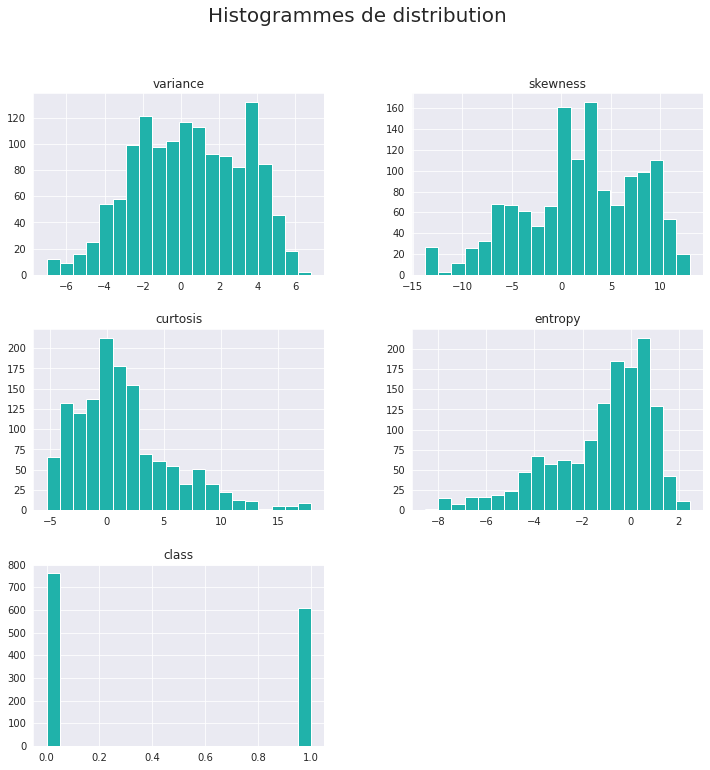

In [ ]:
# Créer une matrice de graphiques pour toutes les variables en même temps
data.hist(bins=20, color="lightseagreen", figsize=(12,12))
plt.suptitle("Histogrammes de distribution", fontsize=20)
plt.show()

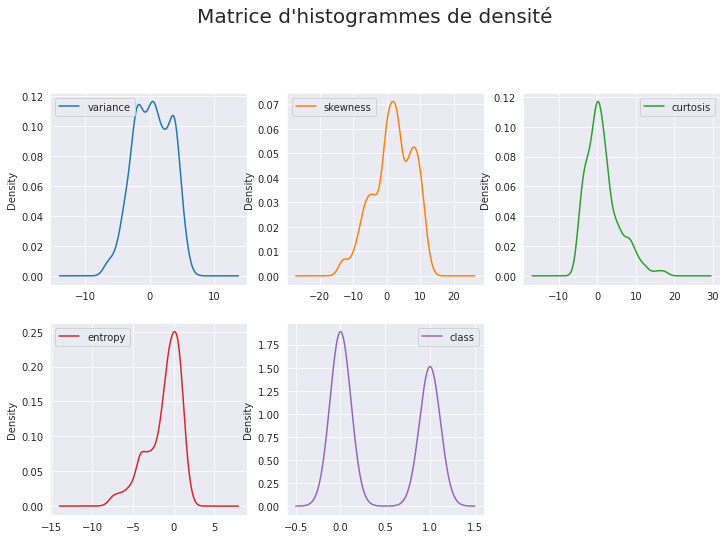

In [ ]:
# 2. Créer des diagrammes de densité

# Créer une matrice de graphiques pour toutes les variables en même temps
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12,12))
plt.suptitle("Matrice d'histogrammes de densité", fontsize=20)
plt.show()

In [ ]:
# 3. Créer la matrice des **graphique boîte à moustache** pour chaque variable du jeu de données.

# Retour sur la fonction describe
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


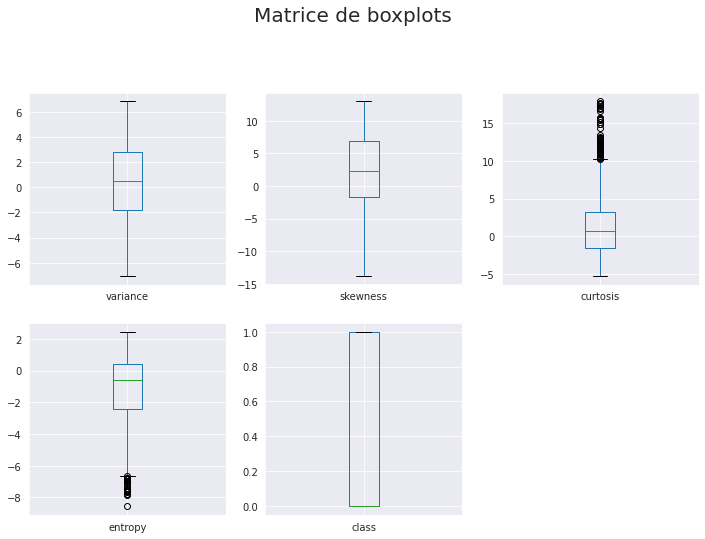

In [ ]:
# Matrice de boxplots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,12))
plt.suptitle("Matrice de boxplots", fontsize=20)
plt.show()

In [ ]:
# Évaluer si le jeu de données est balancé
data.groupby('class').size()

class
0    762
1    610
dtype: int64

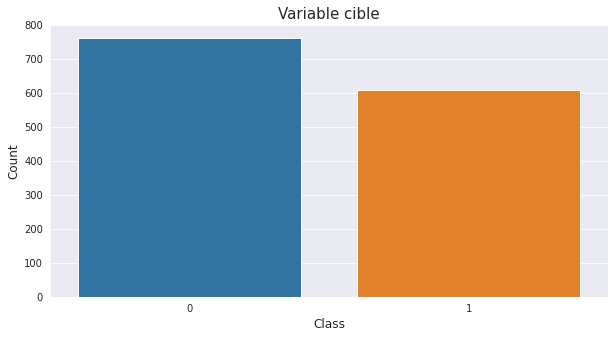

In [ ]:
# Diagramme à barre (barplot)
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="class")
plt.title(label="Variable cible", fontsize=15)
plt.xlabel(xlabel="Class", fontsize=12)
plt.ylabel(ylabel="Count", fontsize=12)
plt.show()

In [ ]:
# 4. Créer une matrice de corrélation

# Produire le tableau des corrélations
correlations = data.corr()
correlations

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


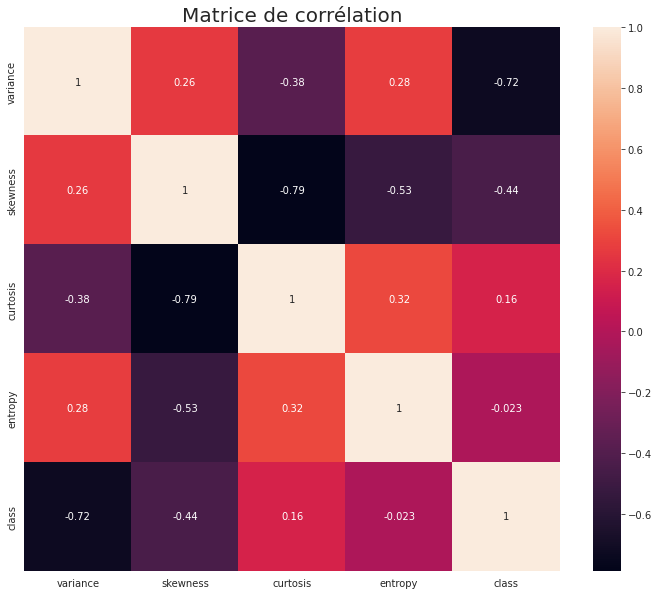

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=correlations, annot=True)
plt.title(label="Matrice de corrélation", fontsize=20)
plt.show()

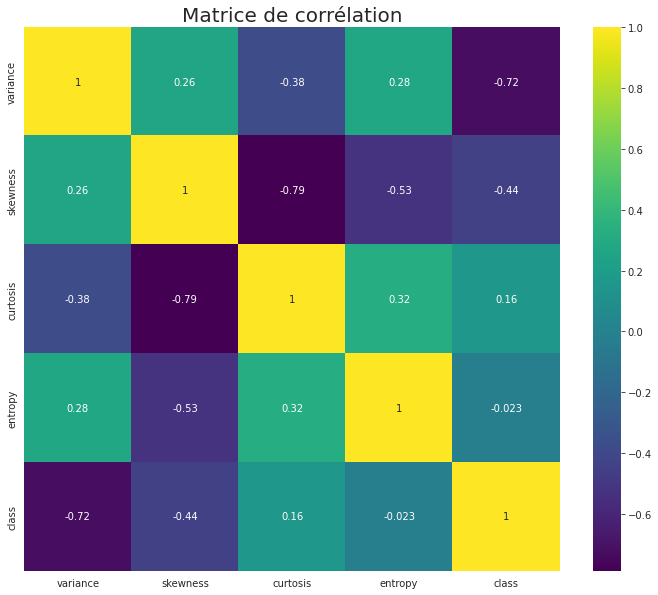

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=correlations, annot=True, cmap="viridis")
plt.title(label="Matrice de corrélation", fontsize=20)
plt.show()

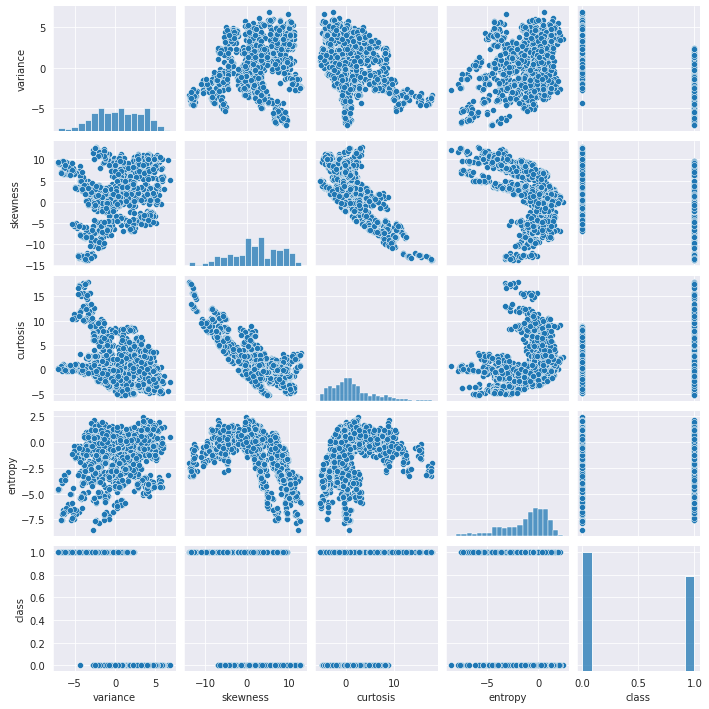

In [ ]:
# 5. Créer une matrice de nuage de données
sns.pairplot(data=data, height=2)

# CORRIGÉ LEÇON #6

## Pré-traitement des données

##  1. Préparer les données

In [ ]:
import numpy as np
from numpy import set_printoptions

In [ ]:
# Transposer la table de données en array numpy
data_array = data.values

In [ ]:
# Aperçu de la structure de la table de données
data_array.shape

(1372, 5)

In [ ]:
# Sélectionner les valeurs d'entrée (X)
X = data_array[:,0:4]
X.shape

(1372, 4)

In [ ]:
# Sélectionner les valeurs de sortie (Y)
Y = data_array[:,4]
Y.shape

(1372,)

In [ ]:
# Imprimer les valeurs brutes de X 
set_printoptions(precision=3, suppress=True)
print(data_array[0:5,:])

[[ 3.622  8.666 -2.807 -0.447  0.   ]
 [ 4.546  8.167 -2.459 -1.462  0.   ]
 [ 3.866 -2.638  1.924  0.106  0.   ]
 [ 3.457  9.523 -4.011 -3.594  0.   ]
 [ 0.329 -4.455  4.572 -0.989  0.   ]]


## Tester les 4 méthodes de transformation

### 6.2 Redimensionner les données

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Activer minmaxscaler avec un intervalle de 0 à 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Transformer les données
X_scaled = scaler.fit_transform(X)

# Imprimer les valeurs d'entrée transformées (5 premières lignes seulement)
set_printoptions(precision=3)
print(X_scaled[0:5,:])

[[0.769 0.84  0.107 0.737]
 [0.836 0.821 0.122 0.644]
 [0.787 0.417 0.311 0.787]
 [0.757 0.872 0.055 0.45 ]
 [0.532 0.349 0.425 0.687]]


### 6.3 Standardiser les données

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Activer standardscaler
scaler = StandardScaler()

# Transformer les données
X_scaled = scaler.fit_transform(X)

# Imprimer les valeurs d'entrée transformées (5 premières lignes seulement)
set_printoptions(precision=3)
print(X_scaled[0:5,:])

[[ 1.122  1.149 -0.976  0.355]
 [ 1.447  1.064 -0.895 -0.129]
 [ 1.208 -0.777  0.122  0.618]
 [ 1.064  1.295 -1.255 -1.144]
 [-0.037 -1.087  0.737  0.097]]


### 6.4 Normaliser les données

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
# Activer normalizer
scaler = Normalizer()

# Transformer les données
X_scaled = scaler.fit_transform(X)

# Imprimer les valeurs d'entrée transformées (5 premières lignes seulement)
set_printoptions(precision=3)
print(X_scaled[0:5,:])

[[ 0.369  0.883 -0.286 -0.046]
 [ 0.465  0.836 -0.252 -0.15 ]
 [ 0.764 -0.521  0.38   0.021]
 [ 0.301  0.83  -0.35  -0.313]
 [ 0.051 -0.689  0.707 -0.153]]


### 6.5 Binariser les données

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
# Activer Binarizer avec un seuil de 0
scaler = Binarizer(threshold=0)

# Transformer les données
X_scaled = scaler.fit_transform(X)

# Imprimer les valeurs d'entrée transformées (5 premières lignes seulement)
set_printoptions(precision=3)
print(X_scaled[0:5,:])

[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 0.]]


# CORRIGÉ LEÇON #7

## Sélection des caractéristiques
 

In [ ]:
# Importer les librairies Python
import numpy as np
import pandas as pd

# Sélection univariée
from sklearn.feature_selection import SelectKBest, f_classif

# Recursive feature elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Importance des variables
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Préparation des données
array = data.values
X = array[:,0:4]
Y = array[:,4]

In [ ]:
print(X.shape)
print(Y.shape)

(1372, 4)
(1372,)


In [ ]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

### 1 Effectuer une sélection univariée de variables en utilisant SelectKBest.

In [ ]:
# Sélection des variables avec les 4 plus hauts scores
test_fclass = SelectKBest(score_func=f_classif, k=2)
fit_fclass = test_fclass.fit(X, Y)

In [ ]:
# Imprimer les scores
np.set_printoptions(precision=2)
print(f'Score des variables pour le f_classif : {fit_fclass.scores_}')

Score des variables pour le f_classif : [1516.63  337.69   34.12    0.75]


In [ ]:
# Produire le tableau r/capitulatif pour chi2
kbest_fclass = pd.DataFrame(data=[np.array(colnames[:-1]), fit_fclass.scores_, fit_fclass.get_support()]).T
kbest_fclass.columns = ['variable', 'score_kbest', 'support_kbest']
kbest_fclass['score_kbest'] = kbest_fclass['score_kbest'].astype(float)
kbest_fclass = kbest_fclass.round({'score_kbest': 2})
kbest_fclass = kbest_fclass.sort_values(by='score_kbest', ascending=False)
kbest_fclass

,variable,score_kbest,support_kbest
0,variance,1516.63,True
1,skewness,337.69,True
2,curtosis,34.12,False
3,entropy,0.75,False


### 2 Effectuer une élimination récursive des variables (RFE) en identifiant les 2 plus importantes avec leur rang.

In [ ]:
# Extraction des variables
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=2)
fit = rfe.fit(X, Y)

In [ ]:
print(f'Num Features: {fit.n_features_}')
print(f'Selected Features: {fit.support_}')
print(f'Feature Ranking: {fit.ranking_}')

Num Features: 2
Selected Features: [ True False  True False]
Feature Ranking: [1 2 1 3]


In [ ]:
rfe_results = pd.DataFrame(data=[np.array(colnames[:-1]), fit.support_, fit.ranking_]).T
rfe_results.columns = ['variable', 'support_rfe', 'ranking_rfe']
rfe_results = rfe_results.sort_values(by='ranking_rfe')
rfe_results

,variable,support_rfe,ranking_rfe
0,variance,True,1
2,curtosis,True,1
1,skewness,False,2
3,entropy,False,3


### 3 À l'aide d'un RandomForestClassifier, identifier les deux variables avec les scores d'importance les plus élevés.

In [ ]:
# Préparer l'algorithme Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X, Y)

#  Extraire les scores d'importance pour chaque variable
rf_score = model_rf.feature_importances_
print(f'Importance Scores Random Forest: {rf_score}')

Importance Scores Random Forest: [0.54 0.25 0.16 0.05]


In [ ]:
# Préparer l'algorithme Random Forest
model_rf_support = SelectFromModel(RandomForestClassifier(), max_features=2)
model_rf_support.fit(X, Y)

#  Extraire le support pour chaque variable
rf_support = model_rf_support.get_support()
print(f'Support Random Forest: {rf_support}')

Support Random Forest: [ True False False False]


In [ ]:
# Résumer les résultats dans un tableau
gb_results = pd.DataFrame(data=[np.array(colnames[:-1]), rf_score, rf_support]).T
gb_results.columns = ['variable', 'rf_score', 'rf_support']
gb_results['rf_score'] = gb_results['rf_score'].astype(float)
gb_results = gb_results.sort_values(by='rf_score', ascending=False)
gb_results

,variable,rf_score,rf_support
0,variance,0.535963,True
1,skewness,0.250810,False
2,curtosis,0.161862,False
3,entropy,0.051365,False


# CORRIGÉ LEÇON #8

## Échantillonnage

In [ ]:
# Préparation des données
X = data.iloc[:, 0:4]
y = data.iloc[:, 4]

In [ ]:
# Imprimer l'aperçu des colonnes incluses dans X
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
# Imprimer les colonnes incluses dans X
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

### 8.1 Test/Split train

#### 1. Tester la performance d'un algorithme de régression logistic `LogisticRegression` sur le jeu de données `banknote` en **1) partitionant les données en ensemble d'entraînement et de test** et **2) spécifiant une valeur de `random_state` = 21**.

In [ ]:
# Librairies pour la séparation entraînement / test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=21)

In [ ]:
print(X_train[0:5])

      variance  skewness  curtosis  entropy
1198  -1.78860   -6.3486  5.615400  0.42584
714    2.55590    3.3605  2.032100  0.26809
556    1.56730    7.9274 -0.056842 -2.16940
471    0.39559    6.8866  1.058800 -0.67587
1106  -0.12690   -1.1505 -0.951380  0.57843


In [ ]:
print(X_test[0:5])

      variance  skewness  curtosis   entropy
1148  -0.26654  -0.64562  -0.42014  0.891360
875   -1.86290  -0.84841   2.53770  0.097399
631    1.89940   0.97462   4.22650  0.813770
1166  -2.19790  -2.12520   1.71510  0.451710
337    1.01910   2.33000   4.93340  0.829290


In [ ]:
print(y_train[0:5])

1198    1
714     0
556     0
471     0
1106    1
Name: class, dtype: int64


In [ ]:
print(y_test[0:5])

1148    1
875     1
631     0
1166    1
337     0
Name: class, dtype: int64


In [ ]:
# Définir l'algorithme à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Entraîner le modèle avec l'algorithme
lr_model.fit(X_train, y_train)

# Imprimer les paramètres spécifiées pour le modèle
print(lr_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Obtenir les prédictions pour la variable cible `class`
y_pred = lr_model.predict(X_test)

# Tester les prédictions avec la cible réelle 
acc = metrics.accuracy_score(y_test, y_pred)

# Imprimer la précision du modèle
print(f"Précision sur le testing set : {round(acc*100.0, 2)}%")

Précision sur le testing set : 98.55%


### 8.2 Validation croisée

#### Tester la performance d'un algorithme de régression logistic `LogisticRegression` sur le jeu de données `banknote` **en utilisant la validation croisée avec 10 répétition (fold/`cv`)**.

In [ ]:
# Importer les librairies
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Définir le modèle à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Appliquer la validation croisée
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')

In [ ]:
print(f'Liste des scores obtenus : {np.round(cv_scores, 2)}')

Liste des scores obtenus : [0.99 0.99 0.99 0.99 0.97 0.99 1.   1.   0.99 0.99]


In [ ]:
# Extraire et imprimer la performance obtenue
print(f"Précision : {round(cv_scores.mean()*100.0, 2)}% +/- {round(cv_scores.std()*100.0, 2)}%")

Précision : 98.98% +/- 0.81%


# CORRIGÉ LEÇON #9

## Évaluation d'algorithmes

In [ ]:
# Préparation des données
X = data.iloc[:, 0:4]
y = data.iloc[:, 4]

In [ ]:
# Imprimer l'aperçu des colonnes incluses dans X
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
# Imprimer les colonnes incluses dans X
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

### 9.1 Évaluer l'algorithme en utilisant le métrique de précision (accuracy).

* Quelle est la précision du modèle? 
Précision : 98.98% +/- 0.81%

In [ ]:
# Importer les librairies
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Définir le modèle à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Appliquer la validation croisée
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')

In [ ]:
# Extraire et imprimer la performance obtenue
print(f"Précision : {round(cv_scores.mean()*100.0, 2)}% +/- {round(cv_scores.std()*100.0, 2)}%")

Précision : 98.98% +/- 0.81%


### 9.2 Produire la matrice de confusion sous forme de figure.

  * 2.1 Combien y a-t-il de faux négatifs? 0
  * 2.2 Que cela signifie-t-il en mot? Écrire la réponse en une phrase. Aucun des billets qui sont en réalité des vrais n'ont été prédits comme étant faux.

In [ ]:
# Importer les librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
# Séparer le jeu de données en sous-ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Définir l'algorithme à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Entraîner le modèle avec l'algorithme
lr_model.fit(X_train, y_train)

# Obtenir les prédictions pour la variable cible `class`
y_pred = lr_model.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[146   2]
 [  0 127]]


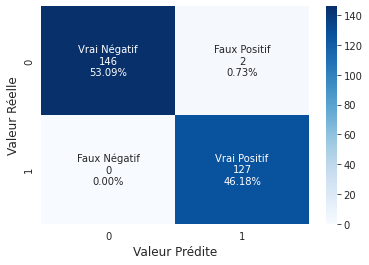

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

group_names = ['Vrai Négatif','Faux Positif','Faux Négatif','Vrai Positif']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Valeur Prédite', size=12)
plt.ylabel('Valeur Réelle', size=12)
plt.show()

### 9.3 Produire le rapport de classification.

  * 3.1 Quel est le score F1? 0.99

In [ ]:
# Importer les librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Séparer le jeu de données en sous-ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Définir l'algorithme à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Entraîner le modèle avec l'algorithme
lr_model.fit(X_train, y_train)

# Obtenir les prédictions pour la variable cible `class`
y_pred = lr_model.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.98      1.00      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



### 9.4 Obtenir l'aire sous la courbe ROC.
  * 4.1 Faire le graphique de la courbe ROC.
  * 4.2 Calculer la sensitivité.
  * 4.3 Calculer la spécificité.

In [ ]:
# Importer les librairies
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

In [ ]:
# Définir le modèle à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Appliquer la validation croisée
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='roc_auc')

In [ ]:
# Extraire et imprimer la performance obtenue
print(f"Précision : {round(cv_scores.mean(), 3)} +/- {round(cv_scores.std(), 3)}")

Précision : 1.0 +/- 0.0


In [ ]:
# Séparer le jeu de données en sous-ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Définir l'algorithme à utiliser
lr_model = LogisticRegression(max_iter=1000)

# Entraîner le modèle avec l'algorithme
lr_model.fit(X_train, y_train)

# Obtenir les prédictions pour la variable cible `class`
y_pred = lr_model.predict(X_test)

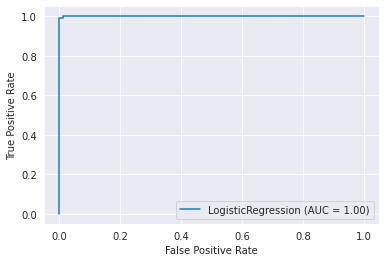

In [ ]:
plot_roc_curve(lr_model, X_test, y_test) 
plt.show()